In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
data=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [4]:
data.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
data.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
data.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [8]:
data.shape

(2224, 11)

TASK 1 - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [9]:
data["Month"]=pd.to_datetime(data["Date_month_year"]).dt.month_name()

In [10]:
data.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August


In [11]:
data["Date"]=pd.to_datetime(data["Date_month_year"]).dt.day

In [12]:
data.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,4,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August


In [14]:
data["day_of_week"]=pd.to_datetime(data["Date_month_year"]).dt.day_name()

In [15]:
data.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,day_of_week
0,250635,Comcast Cable Internet Speeds,22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Wednesday
1,223441,Payment disappear - service got disconnected,4,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,Tuesday


In [13]:
data["Status"].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [16]:
data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'Month', 'day_of_week'],
      dtype='object')

## Graph for date wise

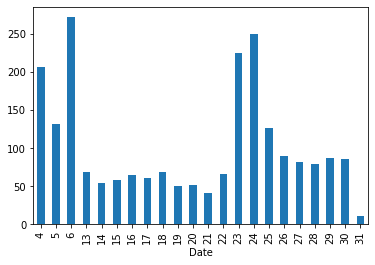

In [17]:
data.groupby(['Date'])['Customer Complaint'].count().plot(kind='bar')
plt.show()

## Graph for Month wise

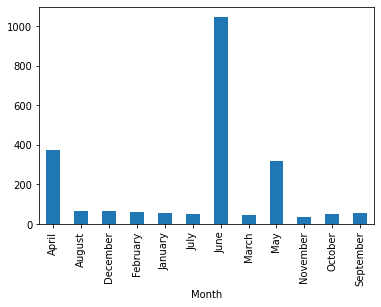

In [18]:
data.groupby(['Month'])['Customer Complaint'].count().plot(kind='bar')
plt.show()

## Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [19]:
data['Customer Complaint'].value_counts()

Comcast                                                   83
Comcast Internet                                          18
Comcast Data Cap                                          17
comcast                                                   13
Data Caps                                                 11
                                                          ..
Comcast cable outage                                       1
Internet connectivity and speed                            1
Charged double/Speeds throttled                            1
Comcast service levels                                     1
Comcast Support Unable to Provide Accurate Information     1
Name: Customer Complaint, Length: 1841, dtype: int64

## Provide a table with the frequency of complaint types.

In [21]:
data['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
...,...,...
1836,Comcast cable outage,1
1837,Internet connectivity and speed,1
1838,Charged double/Speeds throttled,1
1839,Comcast service levels,1


In [22]:
data['Status_new']=data['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')

In [23]:
data.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,day_of_week,Status_new
0,250635,Comcast Cable Internet Speeds,22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Wednesday,Closed
1,223441,Payment disappear - service got disconnected,4,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,Tuesday,Closed
2,242732,Speed and Service,18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Saturday,Closed


In [24]:
data["Status_new"].value_counts().to_frame().reset_index()

,index,Status_new
0,Closed,1707
1,Open,517


In [25]:
data["Status"].value_counts().to_frame().reset_index()

,index,Status
0,Solved,973
1,Closed,734
2,Open,363
3,Pending,154


#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on
#:Which state has the maximum complaints

In [26]:
opn= data[data['Status_new']=='Open'].groupby(['State'])['Status_new'].count().to_frame().reset_index()
clos=data[data['Status_new']=='Closed'].groupby(['State'])['Status_new'].count().to_frame().reset_index()

In [27]:
opn.head(3)

,State,Status_new
0,Alabama,9
1,Arizona,6
2,California,61


In [28]:
clos.head(3)

,State,Status_new
0,Alabama,17
1,Arizona,14
2,Arkansas,6


Text(0.5, 1.0, 'State wise Status Count')

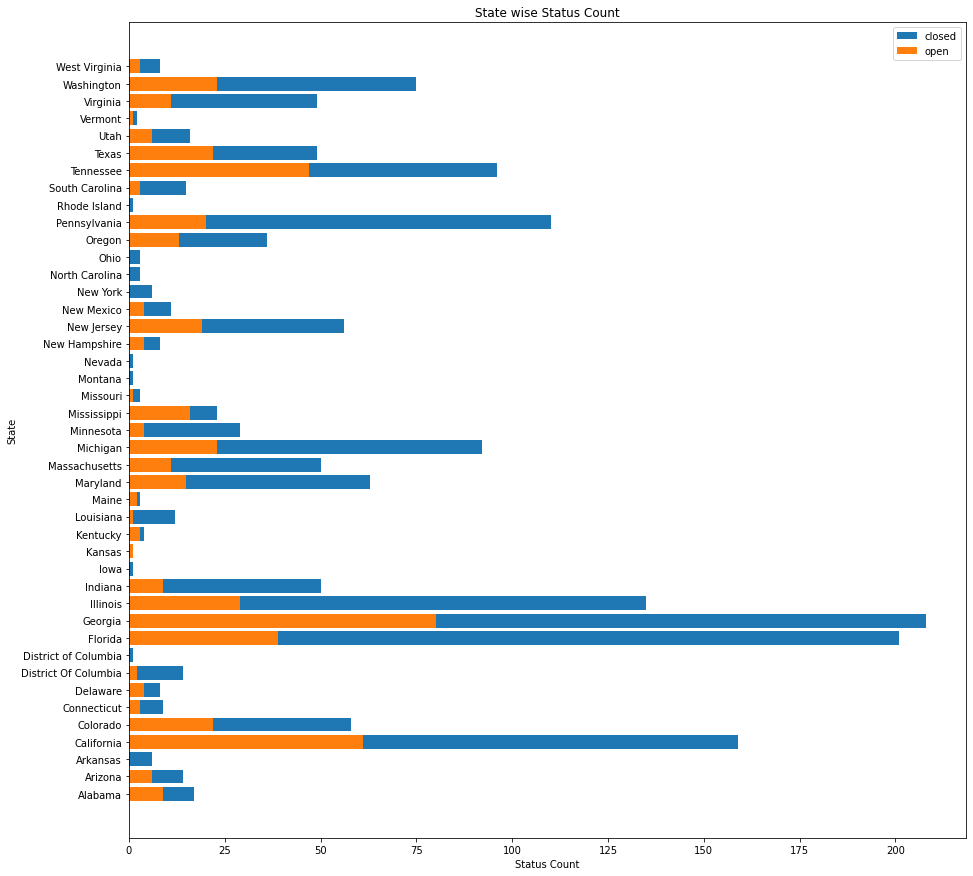

In [29]:
fig=plt.figure(figsize=(15,15))
plt.barh(clos.State, clos.Status_new)
plt.barh(opn.State, opn.Status_new)
plt.ylabel("State")
plt.xlabel("Status Count")
plt.legend(["closed", "open"])
plt.title("State wise Status Count")

## Which state has the maximum complaints


In [30]:
data.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head(1)

State
Georgia    288
Name: Customer Complaint, dtype: int64

## Which state has the highest percentage of unresolved complaints

In [31]:
unresolved_state=data.loc[data['Status_new']=='Open',['State']].value_counts()
unresolved_state.head(1)/unresolved_state.sum()*100

State  
Georgia    15.473888
dtype: float64

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [33]:
data["Received Via"].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [34]:
data[data['Status_new']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    52.724796
        Internet              47.275204
Solved  Internet              50.976362
        Customer Care Call    49.023638
Name: Received Via, dtype: float64